In [4]:
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

# We'll hack a bit with^
RS = 20150101

import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
from mpl_toolkits import mplot3d
%matplotlib inline

import seaborn as sns
# sns.set_style('darkgrid')
# sns.set_palette('muted')
# sns.set_context("notebook", font_scale=1.5,
# rc={"lines.linewidth": 2.5})

In [5]:
digits = load_digits()
digits.data.shape
# each element in digits.data is a tensor of len 64 
# and each coordinate is intencity of white

(1797, 64)

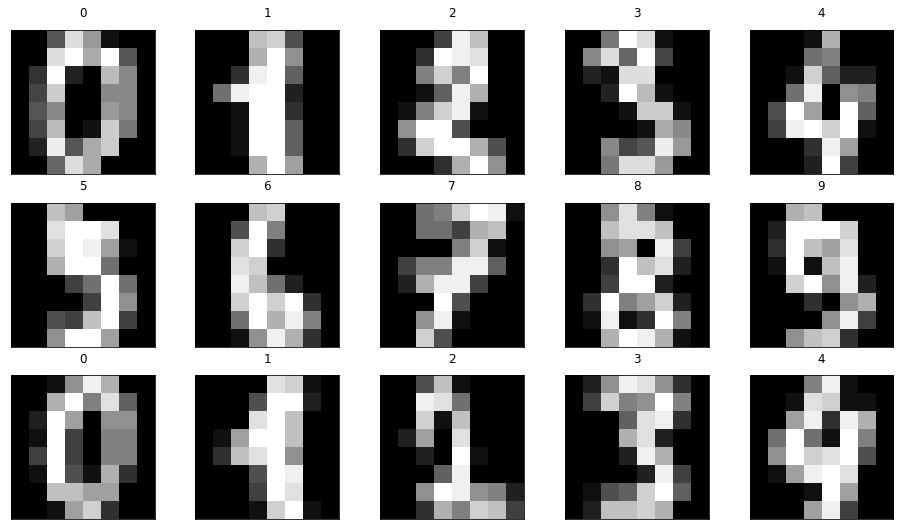

In [6]:
nrows, ncols = 3, 5
plt.figure(figsize=(16,9))
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(digits.images[i,...])
    plt.xticks([]); plt.yticks([])
    plt.title(digits.target[i], color='k')
plt.show()

Just getting that data

In [70]:
X = np.vstack([digits.data[digits.target==i]
               for i in range(10)])
y = np.hstack([digits.target[digits.target==i]
               for i in range(10)])


In [71]:
X.shape, y.shape

((1797, 64), (1797,))

In [73]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  3.,  0.,  0.],
       [ 0.,  0.,  3., ...,  4.,  0.,  0.],
       ...,
       [ 0.,  0.,  4., ...,  9.,  0.,  0.],
       [ 0.,  0.,  4., ...,  9.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.]])

In [74]:
y

array([0, 0, 0, ..., 9, 9, 9])

Helper functions for visualisation

In [14]:
def scatter(x, colors, ax):
    # We choose a color palette with seaborn.
    # 10 colors, lightness = 0.6, saturation=0.9
    palette = np.array(sns.hls_palette(10, l=.6, s=0.9))  

    # We create a scatter plot.
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    
    ax.axis('tight')
    

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return ax, sc

In [20]:
def scatter3d(x, colors, ax):
    # We choose a color palette with seaborn.
    palette = np.array(sns.hls_palette(10, l=.6, s=.9))

    # We create a scatter plot.
    sc = ax.scatter3D(x[:,0], x[:,1], x[:,2], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    ax.axis('tight')
    
    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext, ztext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, ztext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return ax, sc

In [10]:
def display_proj(proj2d, proj3d, y, name=''):
    f = plt.figure(figsize=(12, 16))
    f.suptitle(name)

    ax1 = f.add_subplot(2, 1, 1)
    ax2 = f.add_subplot(2, 1, 2, projection='3d')

    scatter(proj2d, y, ax1)
    scatter3d(proj3d, y, ax2)

    plt.show()

# t-SNE (t-distributed stochastic neighbor embedding)

https://www.datacamp.com/community/tutorials/introduction-t-sne

http://datareview.info/article/algoritm-t-sne-illyustrirovannyiy-vvodnyiy-kurs/

In [18]:
digits_proj = TSNE(random_state=RS).fit_transform(X)
digits_proj_3d = TSNE(n_components=3, random_state=RS).fit_transform(X)

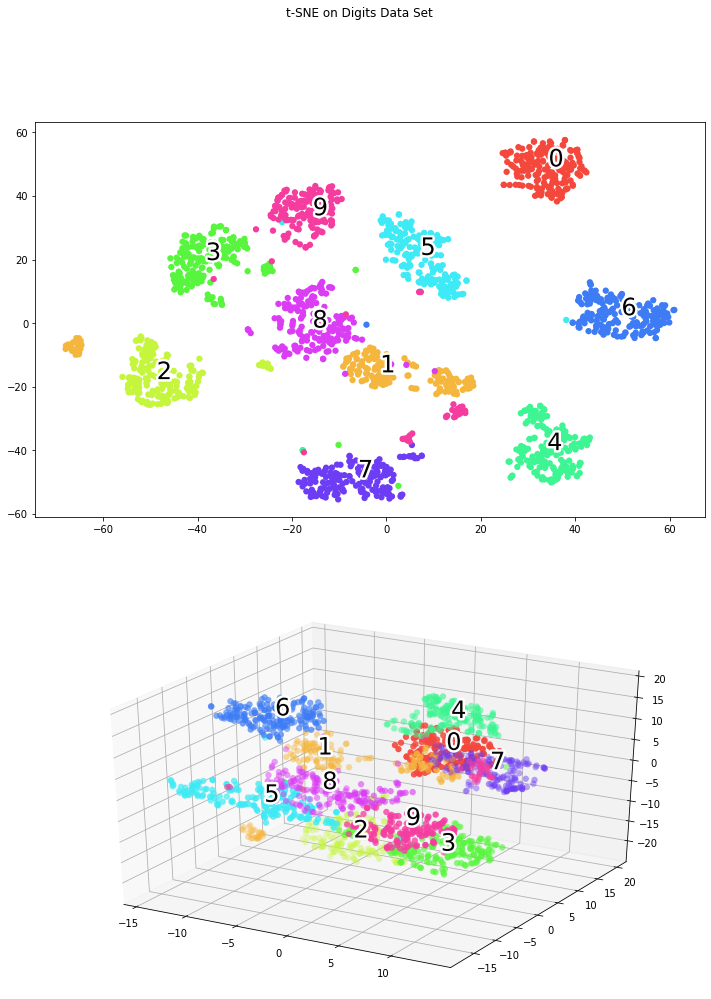

In [21]:
display_proj(digits_proj, digits_proj_3d, y, 't-SNE on Digits Data Set')

# PCA (principal components analysis)

In [22]:
from sklearn.decomposition import PCA

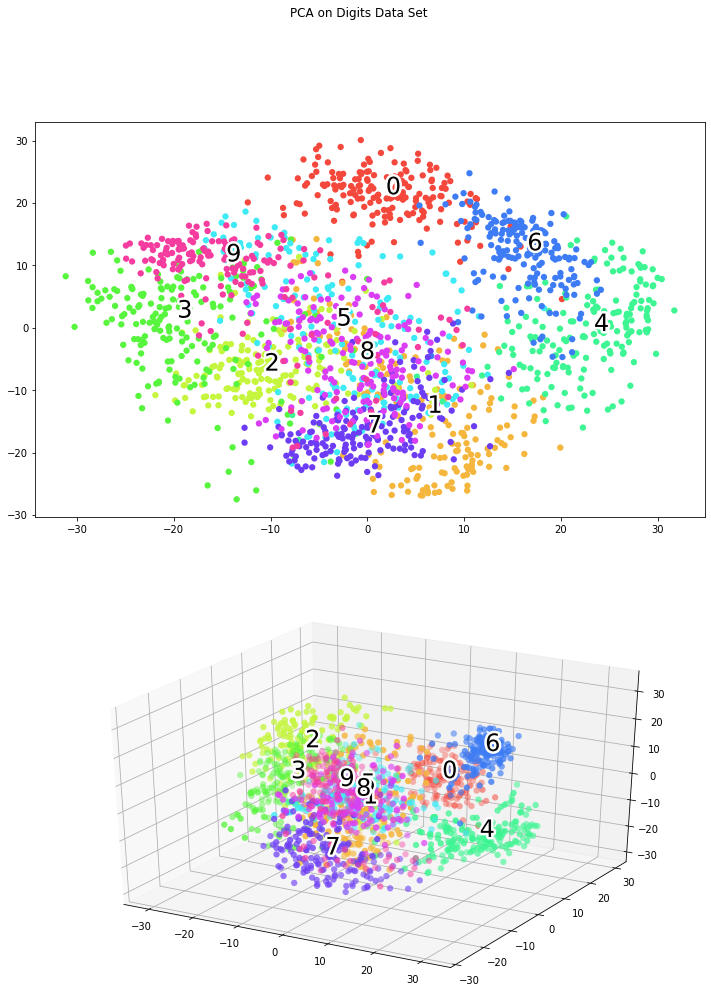

In [72]:
pca_result = PCA(n_components=3).fit_transform(X)

display_proj(pca_result[:,:2], pca_result, y, 'PCA on Digits Data Set')

# PCA + t-SNE

In [24]:
X = PCA(n_components=10).fit_transform(X)

digits_proj = TSNE(random_state=RS).fit_transform(X)
digits_proj_3d = TSNE(n_components=3, random_state=RS).fit_transform(X)

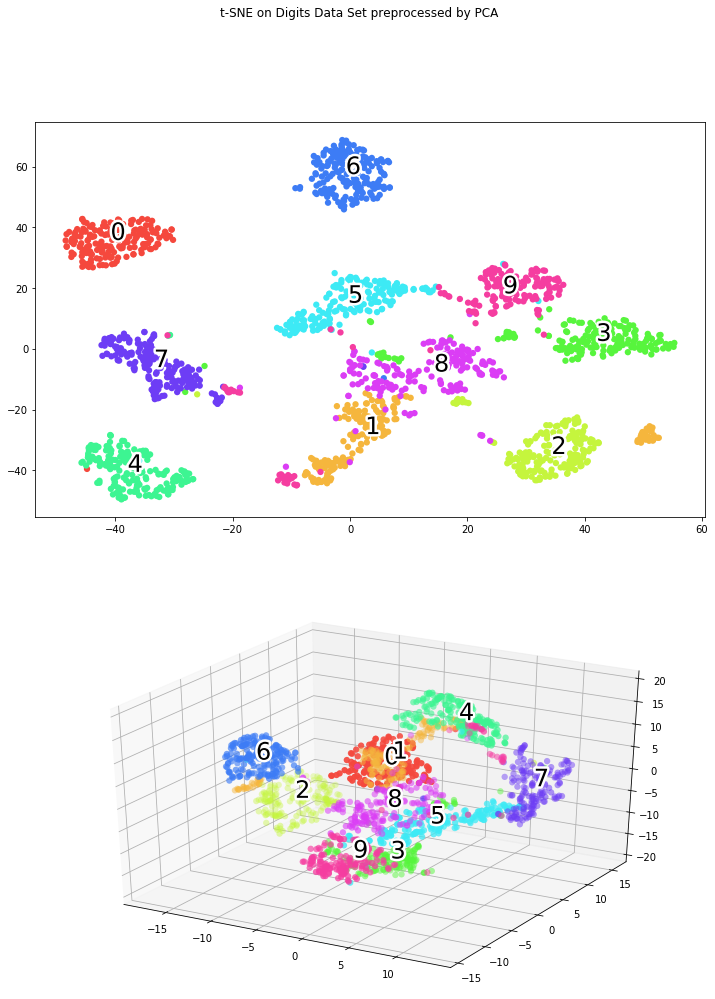

In [25]:
display_proj(digits_proj, digits_proj_3d, y, 't-SNE on Digits Data Set preprocessed by PCA')

# UMAP

https://umap-learn.readthedocs.io/en/latest/parameters.html

https://umap-learn.readthedocs.io/en/latest/basic_usage.html

In [1]:
import umap

In [12]:
umap_result = umap.UMAP().fit_transform(X)
umap_result_3d = umap.UMAP(n_components=3).fit_transform(X)

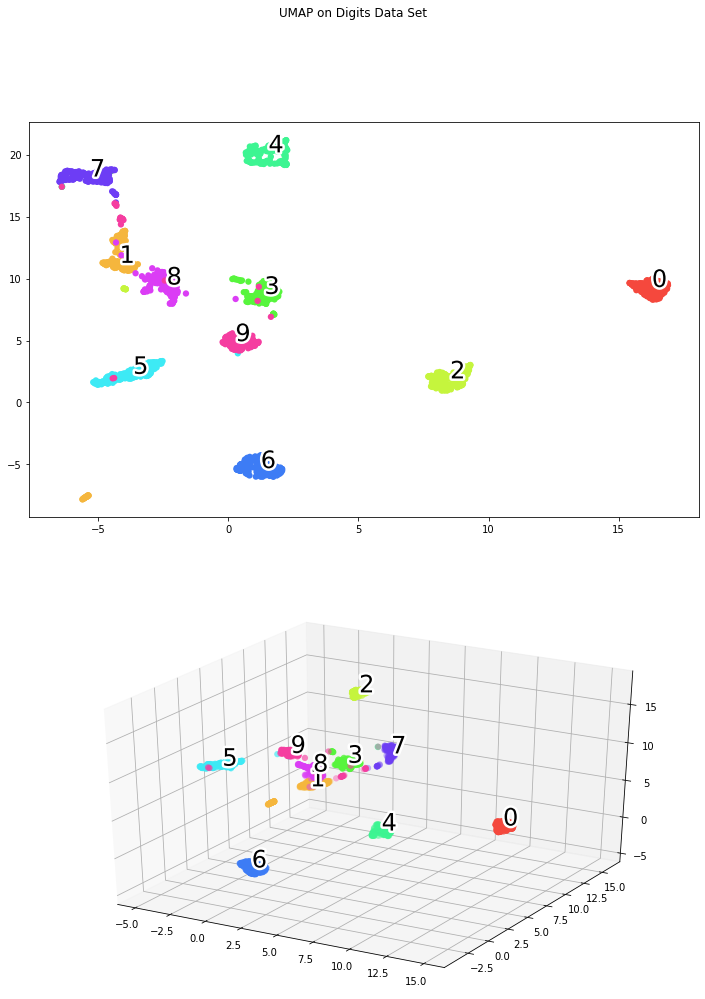

In [27]:
display_proj(umap_result, umap_result_3d, y, 'UMAP on Digits Data Set')